# **Predicting Employee Churn**
1. Analyze employee churn. 
2. Find out why employees are leaving the company.
3. Predict who will leave the company.

## **Exploratory Data Analysis**
Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

Dataset:

1. satisfaction_level: It is employee satisfaction point, which ranges from 0-1.<br>
2. last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1.<br>
3. number_projects: How many numbers of projects assigned to an employee?<br>
4. average_monthly_hours: How many average numbers of hours worked by an employee in a month?<br>
5. time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.<br>
6. work_accident: Whether an employee has had a work accident or not.<br>
7. promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.<br>
8. Departments: Employee's working department/division.
Salary: Salary level of the employee such as low, medium and high.<br>
9. left: Whether the employee has left the company or not.<br>


In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pandas.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# stayed vs left
left = df.groupby('left')
left.mean()

# ->
# Here you can interpret, Employees who left the company had low satisfaction level, 
# low promotion rate, low salary, and worked more compare to who stayed in the company.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [6]:
# Stayed vs left
df.left.value_counts()

# 3571/15000 = ~24% employees left

0    11428
1     3571
Name: left, dtype: int64

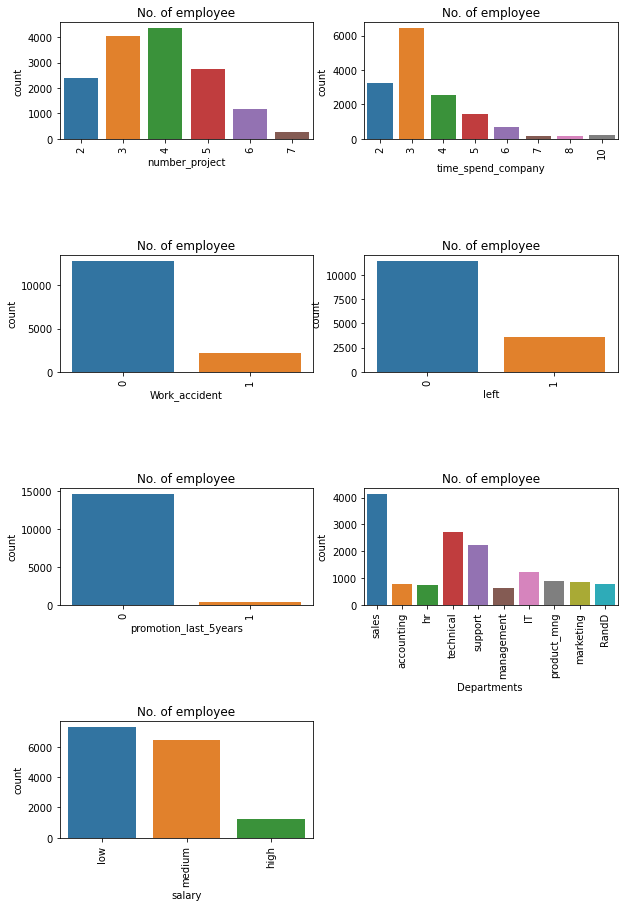

In [7]:
features=['number_project','time_spend_company','Work_accident','left', 
          'promotion_last_5years','Departments ','salary']

fig = plt.subplots(figsize=(10, 15))

for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x = j, data = df)
    plt.xticks(rotation = 90)
    plt.title("No. of employee")

You can observe the following points in the above visualization:

1. Most of the employees are doing 2-5 projects.<br>
2. There is a huge drop between 3 years and 4 years experienced employee.<br>
3. The no of employee left is 24 % of the total employment.<br>
4. A very few employees got promotion in the last 5 year.<br>
5. The sales department is having maximum no.of employee followed by technical and support<br>
6. Most of the employees are getting salary either medium or low.<br>


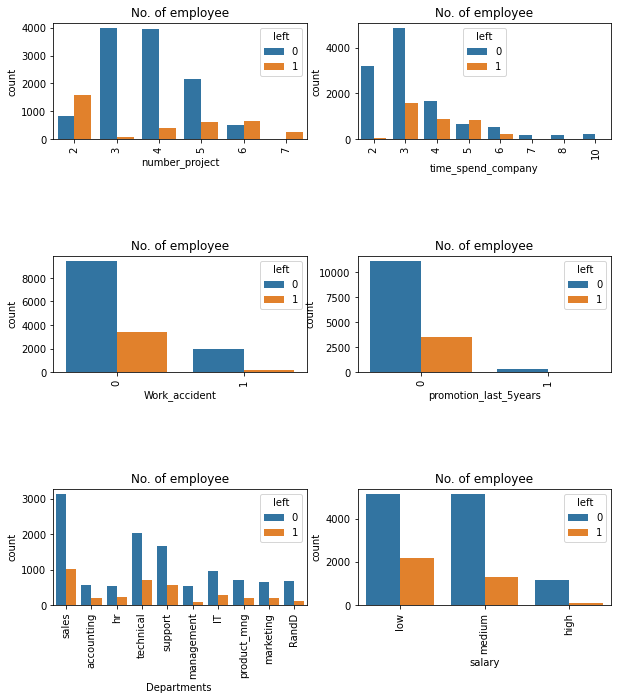

In [8]:
features=['number_project','time_spend_company','Work_accident', 
          'promotion_last_5years','Departments ','salary']

fig = plt.subplots(figsize=(10,15))

for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x = j,data = df, hue='left')
    plt.xticks(rotation = 90)
    plt.title("No. of employee")

You can observe the following points in the above visualization:

1. Most of the employees with number of projects more than 5 left the company(may be because of work load or are bored).<br>
2. The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company or they are settled.<br>
3. Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.<br>


**Data Analysis and Visualization Summary:**
<br>Following features are most influencing a person to leave the company:
<br><br>
**Promotions:** Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.<br>
**Time with Company:** Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.
<br>
**Number Of Projects:** Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.
<br>
**Salary:** Most of the employees that quit among the mid or low salary groups.

## **Clustering & Prediction**

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [9]:
# Filter data
left_emp =  df[['satisfaction_level', 'last_evaluation']][df.left == 1]

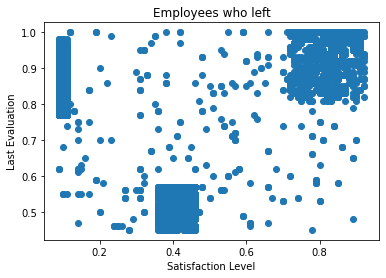

In [10]:
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'])
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Employees who left')
plt.show()

In [11]:
#import module
from sklearn.cluster import KMeans

# Create groups using K-means clustering. k = 3 on the basis of above plot
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


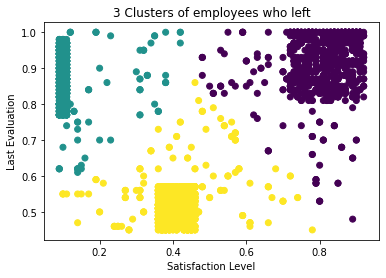

In [12]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'])
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

Here, Employee who left the company can be grouped into 3 type of employees:

1. High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.<br>
2. Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.<br>
3. Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.<br>

Prediction



In [13]:
# Pre-Processing Data

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
# Converting categories into numbers
df['salary']=le.fit_transform(df['salary'])
df['Departments ']=le.fit_transform(df['Departments '])

In [14]:
#Spliting data into Feature and
X=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]

y=df['left']

In [15]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from xgboost import XGBClassifier

In [16]:
def print_metrics(y_test, y_pred):
  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
  # Model Precision
  print("Precision:", metrics.precision_score(y_test, y_pred))
  # Model Recall
  print("Recall:", metrics.recall_score(y_test, y_pred))

In [17]:
 # Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test


In [18]:
# Logistic Regression
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)

# Predicting for test dataset
y_pred = lr_classifier.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy: 0.7604444444444445
Precision: 0.4941860465116279
Recall: 0.23787313432835822


In [19]:
# Support Vector Machine (SVM)
SVCclassifier = SVC()
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy: 0.7846666666666666
Precision: 1.0
Recall: 0.0960820895522388


In [20]:
# Gaussian NB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy: 0.7991111111111111
Precision: 0.5616740088105727
Recall: 0.7136194029850746


In [21]:
# Decision Tree
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy: 0.9726666666666667
Precision: 0.928635953026197
Recall: 0.9589552238805971


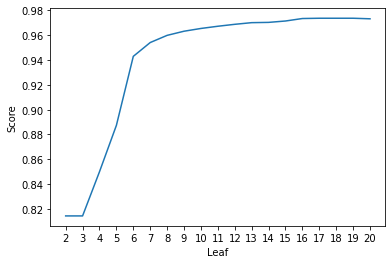

Decision Tree Accuracy: 97.36%


In [22]:
# Decision Tree
scoreListDT = []
modelListDT = [] 
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    modelListDT.append(DTclassifier)
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [23]:
#  Random Forest
RFclassifier = RandomForestClassifier()
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy: 0.9877777777777778
Precision: 0.9922555663117134
Recall: 0.9561567164179104


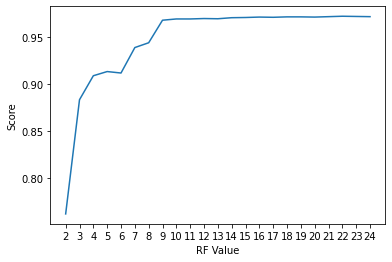

Random Forest Accuracy:  97.24%


In [24]:
#  Random Forest
scoreListRF = []
modelListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    modelListRF.append(RFclassifier)
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [25]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Predicting for test dataset
y_pred = gb_classifier.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


In [26]:
# XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Predicting for test dataset
y_pred = xgb_classifier.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy: 0.9846666666666667
Precision: 0.9808245445829339
Recall: 0.9542910447761194
